In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

UsageError: Line magic function `%tensorflow_version` not found.


In [3]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
import cv2 
import utils 

%matplotlib inline 

# Simple neural network 

This notebook will build a simple neural network on flattened image data.  After assessing performance, we'll try out a conv net. 

## Load data 

In [24]:
import glob
imgs_filenames = glob.glob("data/cat/orange/*.jpg")
imgs_filenames

['data/cat/orange\\cat01.jpg',
 'data/cat/orange\\cat02.jpg',
 'data/cat/orange\\cat03.jpg',
 'data/cat/orange\\cat04.jpg',
 'data/cat/orange\\cat05.jpg',
 'data/cat/orange\\cat06.jpg',
 'data/cat/orange\\cat07.jpg',
 'data/cat/orange\\cat08.jpg']

In [25]:
w_size = 13

X, y = utils.imgs_to_dataset(imgs_filenames, squeeze=False, padding=w_size+2, window_size=w_size)
X.shape, y.shape 

((80000, 13, 13), (80000, 3))

In [26]:
X = np.expand_dims(X, axis=-1)
X.shape

(80000, 13, 13, 1)

In [27]:
X = utils.normalize(X)
y = utils.normalize(y)

## Model building 

In [28]:
from tensorflow.keras.layers import Dense, InputLayer, Conv2D, Flatten

In [29]:
model = tf.keras.Sequential([ 
    Conv2D(10, kernel_size=(6, 6), padding='same', input_shape=(w_size, w_size, 1)), 
    Conv2D(20, kernel_size=(4, 4), padding='same'), 
    Flatten(), 
    Dense(3, activation='relu')
])

model.compile(optimizer='adam', loss='mse')  
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 13, 13, 10)        370       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 20)        3220      
_________________________________________________________________
flatten_4 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 10143     
Total params: 13,733
Trainable params: 13,733
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X, y, epochs=100, verbose=2)

Train on 80000 samples
Epoch 1/100
80000/80000 - 14s - loss: 0.0074
Epoch 2/100
80000/80000 - 14s - loss: 0.0065
Epoch 3/100
80000/80000 - 13s - loss: 0.0064
Epoch 4/100
80000/80000 - 13s - loss: 0.0063
Epoch 5/100
80000/80000 - 13s - loss: 0.0063
Epoch 6/100
80000/80000 - 13s - loss: 0.0063
Epoch 7/100
80000/80000 - 13s - loss: 0.0063
Epoch 8/100
80000/80000 - 13s - loss: 0.0062
Epoch 9/100
80000/80000 - 13s - loss: 0.0062
Epoch 10/100
80000/80000 - 13s - loss: 0.0062
Epoch 11/100
80000/80000 - 13s - loss: 0.0062
Epoch 12/100
80000/80000 - 13s - loss: 0.0062
Epoch 13/100
80000/80000 - 13s - loss: 0.0062
Epoch 14/100
80000/80000 - 13s - loss: 0.0062
Epoch 15/100
80000/80000 - 13s - loss: 0.0062
Epoch 16/100
80000/80000 - 13s - loss: 0.0062
Epoch 17/100
80000/80000 - 13s - loss: 0.0062
Epoch 18/100
80000/80000 - 13s - loss: 0.0062
Epoch 19/100
80000/80000 - 13s - loss: 0.0062
Epoch 20/100
80000/80000 - 13s - loss: 0.0062
Epoch 21/100
80000/80000 - 13s - loss: 0.0062
Epoch 22/100
80000/8

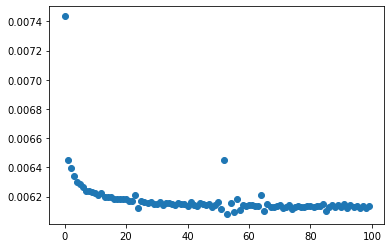

In [32]:
l = history.history['loss']
plt.scatter(np.arange(len(l)), l)

## Testing 

In [37]:
test_img_path = 'data/cat/orange/cat01.jpg'
test_img = utils.Image(test_img_path, padding=w_size+2)
X_test, y_test = utils.img_to_dataset(test_img, window_size=w_size, squeeze=False)  
X_test = np.expand_dims(X_test, axis=-1)

y_pred = model.predict(X_test)

In [38]:
colored = utils.reconstruct_from_vectors(blue=y_pred[:, 0], green=y_pred[:, 1], 
                                         red=y_pred[:, 2], dimension=100)
colored = utils.to_255_scale(colored)

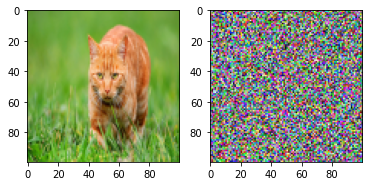

In [39]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(cv2.cvtColor(test_img.data_nopadding, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(colored.astype('uint8'), cv2.COLOR_BGR2RGB))

NOT WORKIN' 